# COMPSCI 371D Homework 10

Write the names of all contributors to this assignment here:

+ ...
+ ...

## Part 1: Classification with Random Decision Forests

In [1]:
import numpy as np
import pickle
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from math import sqrt

def train_tree(samples, problem='classification', splitter='random'):
    classifier = DecisionTreeClassifier if problem == 'classification'\
        else DecisionTreeRegressor
    h = classifier(splitter=splitter)
    return h.fit(samples['x'], samples['y'])

def tree_predict(x, tau):
    return tau.predict(x)

In [2]:
def error_rate(y, predictions, problem='classification'):
    score = (1. - accuracy_score(y, predictions)) * 100 if problem == 'classification'\
        else sqrt(mean_squared_error(y, predictions))
    return score

with open('data.pickle', 'rb') as file:
    data = pickle.load(file)

print('Decision tree classification:')
message = '{}ing error rate with {} splitter is {:.2f} percent'
for splitter in ('best', 'random'):
    %time tree = train_tree(data['train'], splitter=splitter)
    for data_type in ('train', 'test'):
        y_hat = tree_predict(data[data_type]['x'], tree)
        print(message.format(data_type, splitter, error_rate(data[data_type]['y'], y_hat)))

Decision tree classification:
CPU times: user 415 ms, sys: 1.71 ms, total: 416 ms
Wall time: 432 ms
training error rate with best splitter is 0.00 percent
testing error rate with best splitter is 18.69 percent
CPU times: user 40.9 ms, sys: 841 µs, total: 41.7 ms
Wall time: 41.6 ms
training error rate with random splitter is 0.00 percent
testing error rate with random splitter is 17.94 percent


### Problem 1.1 (Exam-Style)

### Problem 1.2 (Exam-Style)

### Problem 1.3

In [3]:
from scipy import stats

def mode(predictions):
    return stats.mode(predictions).mode[0].astype(int)

### Problem 1.4 (Exam-Style)

## Part 2: Regression with Random Decision Forests

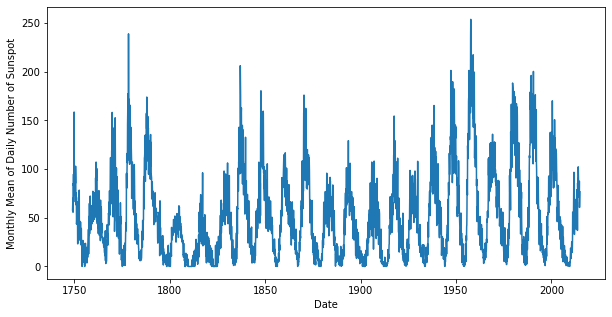

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

with open('sunspots.pickle', 'rb') as file:
    sunspots = pickle.load(file)

plt.figure(figsize=(10, 5))
plt.plot(sunspots['x'], sunspots['y'].flatten())
plt.xlabel('Date')
plt.ylabel('Monthly Mean of Daily Number of Sunspot')
plt.show()

In [5]:
test_fraction = 0.9
training_set, test_set = {}, {}
training_set['x'], test_set['x'], training_set['y'], test_set['y'] = \
    train_test_split(sunspots['x'], sunspots['y'],
                     test_size=test_fraction, random_state=1)

### Problem 2.1

### Problem 2.2 (Exam-Style)

### Problem 2.3

### Problem 2.4 (Exam-Style)